<a href="https://colab.research.google.com/github/Joestivus/230525_2do_Intento/blob/main/modulo_2/5.%20Lab_NLP_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align="center"><font size="5">NLP ANALYTICS</font></h1>

<h2> Objetivo </h2>

El objetivo del presente laboratorio es el de aplicar modelos de deep learning basados en <b>Language Modeling</b>. Para ello, utilizaremos pre-entrenados para poder realizar el proceso de predicción directamente desde un modelo potente.

<h2> Natural Language Toolkit </h2>


NLTK ó [Natural Language Toolkit](https://www.nltk.org/) es una plataforma líder para crear programas Python que funcionen con datos de lenguaje humano. Proporciona interfaces fáciles de usar para más de 50 corpora y recursos léxicos como WordNet, junto con un conjunto de bibliotecas de procesamiento de texto para clasificación, tokenización, derivación, etiquetado, análisis y razonamiento semántico, envoltorios para bibliotecas de PNL de nivel industrial, y un foro de discusión activo.


<img src="https://cdn-images-1.medium.com/max/800/1*jfZ4uK1Tko0TFugEk9oXDw.png" width="700" height="350">



Primero importamos la librería nltk y descargamos complementos

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


Leemos el texto de interés de una página web

In [ ]:
import urllib.request
response =  urllib.request.urlopen('https://es.wikipedia.org/wiki/Teor%C3%ADa_de_juegos')
html = response.read()
print(html)

<h2> Beautiful Soup </h2>

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) es una biblioteca de Python para extraer datos de archivos HTML y XML. Funciona con su analizador favorito para proporcionar formas idiomáticas de navegar, buscar y modificar el árbol de análisis. Por lo general, ahorra a los programadores horas o días de trabajo.

Le daremos formato a nuestro texto utilizando la librería beatifulSoup

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

Tokenizamos la información

In [ ]:
tokens = [t for t in text.split()]
print(tokens)

['Teoría', 'de', 'juegos', '-', 'Wikipedia,', 'la', 'enciclopedia', 'libredocument.documentElement.className="client-js', 'vector-feature-language-in-header-enabled', 'vector-feature-language-in-main-page-header-disabled', 'vector-feature-sticky-header-disabled', 'vector-feature-page-tools-pinned-disabled', 'vector-feature-toc-pinned-enabled', 'vector-feature-main-menu-pinned-disabled', 'vector-feature-limited-width-enabled', 'vector-feature-limited-width-content-enabled', 'vector-feature-zebra-design-disabled";(function(){var', 'cookie=document.cookie.match(/(?:^|;', ')eswikimwclientprefs=([^;]+)/);if(cookie){var', 'featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","', '\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","a

<b>Primer Análisis</b>, eliminamos stopwords y realizamos un cálculo de la frecuencia de las palabras, por último identificamos las palabras más utilizadas

In [ ]:
from nltk.corpus import stopwords

sr = stopwords.words('spanish')
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('spanish'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():
    print(str(key) + ':' + str(val))


freq.plot(20, cumulative=False)

También podemos complementar el listado de stopwords a nuestro juicio propio

In [ ]:
from nltk.corpus import stopwords
sr = stopwords.words('spanish') + ['ser','El','El','Los','1']
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('spanish') + ['ser','El','Los','1']:
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

# Sentiment Analysis

El <b>análisis de sentimientos</b> (o  <b>opinion mining</b>) utiliza el procesamiento del lenguaje natural (<b>Natural Language Processing</b>) y el machine learning para interpretar y clasificar las emociones en datos subjetivos. El análisis de opiniones se utiliza a menudo en los negocios para detectar opiniones en datos sociales, medir la reputación de la marca y comprender a los clientes.

<img src="https://monkeylearn.com/static/3ca10d6ce5dc6922836f278aef38f765/50bf7/what-is-sentiment-analysis6%402x.png" width="500">

<center><i>Fuente: https://monkeylearn.com/sentiment-analysis/</i></center>
<br><br>





<h2> Análisis de sentimientos con Textblob </h2>

[TextBlob](https://textblob.readthedocs.io/en/dev/) es una biblioteca de Python (2 y 3) para procesar datos textuales. Proporciona una API simple para sumergirse en tareas comunes de procesamiento de lenguaje natural (NLP), como etiquetado de parte del discurso, extracción de frases nominales, análisis de sentimientos, clasificación, traducción y más.

<img src="https://textblob.readthedocs.io/en/dev/_static/textblob-logo.png" width="200">




Importamos librerías para tratamiendo de texto

In [ ]:
import tweepy
from textblob import TextBlob

Podemos identificar cada uno de los componentes de la oración

In [ ]:
txt_example = TextBlob("My music lesson is so fantastic")

In [ ]:
txt_example.tags

[('My', 'PRP$'),
 ('music', 'NN'),
 ('lesson', 'NN'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('fantastic', 'JJ')]

In [ ]:
txt_example.words

WordList(['My', 'music', 'lesson', 'is', 'so', 'fantastic'])


<b>TextBlob</b> devuelve la polaridad y subjetividad de una oración. La <b>polaridad</b> se encuentra entre [-1,1], -1 define un sentimiento negativo y 1 define un sentimiento positivo. Las palabras de negación invierten la polaridad.

<b>TextBlob</b>  tiene etiquetas semánticas que ayudan con el análisis detallado. Por ejemplo, emoticonos, signos de exclamación, emojis, etc. La subjetividad se encuentra entre [0,1]. La subjetividad cuantifica la cantidad de opinión personal e información fáctica contenida en el texto. La subjetividad más alta significa que el texto contiene opiniones personales en lugar de información fáctica. TextBlob tiene un parámetro más: la intensidad.

<b>TextBlob</b>  calcula la subjetividad observando la "intensidad". La intensidad determina si una palabra modifica la siguiente. Para el inglés, los adverbios se utilizan como modificadores ("muy bueno").

Finalmente podemos realizar un análisis de la polaridad del sentimiento del texto

In [ ]:
txt_example.sentiment.polarity

0.4

# Social media Sentiment Analytics

Para esto necesitaremos permisos de acceso de investigador a fuentes de social media.

In [ ]:
consumer_key = 'BpMa47xMrhrdg3VnII49WR3lQ'
consumer_secret = '6PTzrDT9wkb3OMG4zKel7mioGKobNDcyPjLX0r5P2Mw0a6rQgB'

access_token = '1865754584-Cnai3Umxlur73nWuTLjerjpX2C2G15Z4BTHxX4K'
access_token_secret = 'qQU1QLdn936VdfHknmGBKizDNDWCMp4fFDpeRhuQFd2yP'


Seteando usuario

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth)

Para comenzar, importaremos los 200 últimos tweets referentes a un tópico particular

In [ ]:
api.user_timeline?

In [ ]:
public_tweets = api.user_timeline(screen_name='Netflix', count = 200)


In [ ]:
public_tweets

Y aplicaremos nuestro análisis de polaridad

In [ ]:
for tweet in public_tweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment.polarity)

In [ ]:
len(public_tweets)

200

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['SCORE'])

In [ ]:
equation = pd.Series([])

for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  a = analysis.sentiment.polarity
  equation = equation.append(pd.Series(a))


<ipython-input-46-04255d4c2eb3>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  equation = pd.Series([])
<ipython-input-46-04255d4c2eb3>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  equation = equation.append(pd.Series(a))
<ipython-input-46-04255d4c2eb3>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  equation = equation.append(pd.Series(a))
<ipython-input-46-04255d4c2eb3>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  equation = equation.append(pd.Series(a))
<ipython-input-46-04255d4c2eb3>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version.

In [ ]:
df['SCORE'] = equation
df.head(10)

,SCORE
0,0.066667
0,-0.750000
0,0.000000
0,0.104167
0,0.500000
0,-0.100000
0,0.032468
0,0.000000
0,0.000000
0,0.193182


,SCORE
count,200.000000
mean,0.092134
std,0.300635
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.167614
max,1.000000


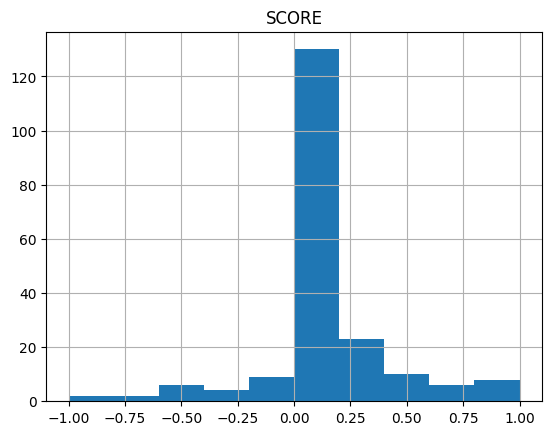

In [ ]:
df.hist()
df.describe()

#Analizando estadisticas de Netflix

In [ ]:
userID = "Netflix"

In [ ]:
# Credenciales de Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

tweets = api.user_timeline(screen_name=userID,
                           # 200 es el recuento máximo permitido
                           count=200,
                           include_rts = False,
                           # Necesario para mantener full_text
                           # de lo contrario, solo se extraen las primeras 140 palabras
                           tweet_mode = 'extended'
                           )

In [ ]:
for info in tweets[:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

Dado que el solamente se nos permite extraer 200 tweets, crearemos un proceso iterativo que nos permitirá extraer bloques de 200 en 200

In [ ]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID,
                           # 200 es el recuento máximo permitido
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necesario para mantener full_text
                           # de lo contrario, solo se extraen las primeras 140 palabras
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

In [ ]:
#transformamos los tweets en un 2D array que será enviado a csv
from pandas import DataFrame
outtweets = [[tweet.id_str,
              tweet.created_at,
              tweet.favorite_count,
              tweet.retweet_count,
              tweet.full_text.encode("utf-8").decode("utf-8")]
             for idx, tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(20)

Realizaremos nuestro primer análisis observando la popularidad del tema

In [ ]:
import matplotlib.pyplot as plt

ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()

In [ ]:
import pandas as pd
dfSent = pd.DataFrame(columns=['SCORE'])

equation = pd.Series([])

for tweet in df.text:
  analysis = TextBlob(tweet)
  a = analysis.sentiment.polarity
  equation = equation.append(pd.Series(a))



In [ ]:
dfSent['SCORE'] = equation
dfSent.head()

In [ ]:
dfSent.hist()
dfSent.describe()